In [1]:
import numpy as np
import time
import gc

In [2]:
from models.bayesian_vae import BayesianVAE

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
VA = BayesianVAE(
                 n_inputs=784,
                 n_neurons_encoder = [256, 128],
                 n_latent=2,
                 n_neurons_decoder = [128, 256],
                 batch_size = 128)

VA.learn(epochs=100, learning_rate=0.01)

   [50.1] Epoch: 01 | NELBO: 434002388661258.937500 | ELL: -2288.297151 | KL: 434002388659594.562500 | Val. NELBO: 12014998600839.748047
   [51.8] Epoch: 02 | NELBO: 164160887522992.343750 | ELL: -930.206348 | KL: 164160887522241.062500 | Val. NELBO: 423912834195.434509
   [49.0] Epoch: 03 | NELBO: 168406334185457.781250 | ELL: -657.855192 | KL: 168406334184847.625000 | Val. NELBO: 159014885.967464
   [49.9] Epoch: 04 | NELBO: 7399023567632.180664 | ELL: -509.058879 | KL: 7399023567151.307617 | Val. NELBO: 207873001451.444000
   [49.0] Epoch: 05 | NELBO: 7288477237596.821289 | ELL: -419.646766 | KL: 7288477237208.266602 | Val. NELBO: 10632489463.805212
   [48.9] Epoch: 06 | NELBO: 631091823970.908203 | ELL: -362.204462 | KL: 631091823626.569824 | Val. NELBO: 60507561560.084137
   [48.1] Epoch: 07 | NELBO: nan | ELL: nan | KL: nan | Val. NELBO: nan
   [48.5] Epoch: 08 | NELBO: nan | ELL: nan | KL: nan | Val. NELBO: nan


KeyboardInterrupt: 

In [3]:
VA = BayesianVAE(
                 n_inputs=784,
                 n_neurons_encoder = [256, 128],
                 n_latent=2,
                 n_neurons_decoder = [128, 256],
                 batch_size = 128)

VA.learn(epochs=100, learning_rate=0.01)

   [6.3] Epoch: 01 | NELBO: 213044991401605.218750 | ELL: -3283.811230 | KL: 213044991399070.031250 | Val. NELBO: 5687040019.075765
   [6.2] Epoch: 02 | NELBO: 523532755814059.812500 | ELL: -1486.040410 | KL: 523532755812704.125000 | Val. NELBO: 153911008.611666
   [6.2] Epoch: 03 | NELBO: 12070876659.853209 | ELL: -1273.108500 | KL: 12070875416.267174 | Val. NELBO: 623297785.408945
   [6.5] Epoch: 04 | NELBO: 4032169349621.004883 | ELL: -1123.077630 | KL: 4032169348526.469727 | Val. NELBO: 590286676.061173
   [6.3] Epoch: 05 | NELBO: 23501859074.423878 | ELL: -996.276533 | KL: 23501858093.543961 | Val. NELBO: 202393862093.026855
   [6.6] Epoch: 06 | NELBO: 224906149813460.375000 | ELL: -884.426399 | KL: 224906149812593.093750 | Val. NELBO: 9380447.297864
   [6.8] Epoch: 07 | NELBO: 6544474562.921355 | ELL: -795.442227 | KL: 6544473774.115122 | Val. NELBO: 190067314.638137
   [6.6] Epoch: 08 | NELBO: 684695070384.329956 | ELL: -719.570887 | KL: 684695069681.216797 | Val. NELBO: 2454158

   [6.5] Epoch: 76 | NELBO: 5738.594208 | ELL: -238.499682 | KL: 5500.094451 | Val. NELBO: 264.569535
   [6.5] Epoch: 77 | NELBO: 428.858122 | ELL: -237.709573 | KL: 191.148543 | Val. NELBO: 14258.107128
   [6.6] Epoch: 78 | NELBO: 1350.237179 | ELL: -238.210018 | KL: 1112.027190 | Val. NELBO: 685.838767
   [6.5] Epoch: 79 | NELBO: 84608.389773 | ELL: -237.853405 | KL: 84370.536444 | Val. NELBO: 390.407293
   [6.7] Epoch: 80 | NELBO: 60799.103507 | ELL: -237.206550 | KL: 60561.894981 | Val. NELBO: 271.268948
   [6.4] Epoch: 81 | NELBO: 386.505245 | ELL: -238.032333 | KL: 148.472916 | Val. NELBO: 270.255411
   [6.5] Epoch: 82 | NELBO: 10012.467517 | ELL: -237.629767 | KL: 9774.837785 | Val. NELBO: 273.580713
   [7.1] Epoch: 83 | NELBO: 1090069.936196 | ELL: -237.115035 | KL: 1089832.836211 | Val. NELBO: 267.712983
   [6.8] Epoch: 84 | NELBO: 270.532220 | ELL: -237.107843 | KL: 33.424377 | Val. NELBO: 264.848584
   [8.2] Epoch: 85 | NELBO: 270.468232 | ELL: -237.127678 | KL: 33.340553 | 

In [3]:
VA = BayesianVAE(
                 n_inputs=784,
                 n_neurons_encoder = [256, 128],
                 n_latent=2,
                 n_neurons_decoder = [128, 256],
                 batch_size = 128)

VA.learn(epochs=100, learning_rate=0.01)

   [11.2] Epoch: 01 | NELBO: 3395.965656 | ELL: -3384.741859 | KL: 11.223798 | Val. NELBO: 1831.526214
   [13.4] Epoch: 02 | NELBO: 1543.258856 | ELL: -1538.906390 | KL: 4.352465 | Val. NELBO: 1409.705275
   [11.8] Epoch: 03 | NELBO: 1358.243193 | ELL: -1354.395350 | KL: 3.847844 | Val. NELBO: 1315.095018
   [11.3] Epoch: 04 | NELBO: 1258.299690 | ELL: -1254.355145 | KL: 3.944542 | Val. NELBO: 1212.587108
   [11.5] Epoch: 05 | NELBO: 1171.251514 | ELL: -1166.743909 | KL: 4.507603 | Val. NELBO: 1131.021387
   [11.5] Epoch: 06 | NELBO: 1091.961397 | ELL: -1087.068804 | KL: 4.892595 | Val. NELBO: 1057.111873
   [11.4] Epoch: 07 | NELBO: 1020.323016 | ELL: -1014.836027 | KL: 5.486989 | Val. NELBO: 985.631216
   [11.3] Epoch: 08 | NELBO: 951.712779 | ELL: -945.692566 | KL: 6.020214 | Val. NELBO: 916.121513
   [11.5] Epoch: 09 | NELBO: 893.965377 | ELL: -887.549199 | KL: 6.416178 | Val. NELBO: 866.718741
   [11.5] Epoch: 10 | NELBO: 837.851011 | ELL: -830.572783 | KL: 7.278229 | Val. NELBO: 

   [11.5] Epoch: 83 | NELBO: 285.855957 | ELL: -271.746761 | KL: 14.109197 | Val. NELBO: 286.323617
   [11.6] Epoch: 84 | NELBO: 286.484783 | ELL: -272.299154 | KL: 14.185629 | Val. NELBO: 287.260282
   [11.4] Epoch: 85 | NELBO: 285.993161 | ELL: -271.755457 | KL: 14.237704 | Val. NELBO: 287.036089
   [11.5] Epoch: 86 | NELBO: 285.714392 | ELL: -271.613789 | KL: 14.100602 | Val. NELBO: 287.464665
   [11.9] Epoch: 87 | NELBO: 285.793839 | ELL: -271.706467 | KL: 14.087372 | Val. NELBO: 286.622731
   [11.5] Epoch: 88 | NELBO: 285.721683 | ELL: -271.572603 | KL: 14.149080 | Val. NELBO: 285.487009
   [11.4] Epoch: 89 | NELBO: 285.718335 | ELL: -271.740534 | KL: 13.977800 | Val. NELBO: 287.801519
   [11.6] Epoch: 90 | NELBO: 285.942524 | ELL: -271.708024 | KL: 14.234500 | Val. NELBO: 285.751196
   [11.6] Epoch: 91 | NELBO: 285.611331 | ELL: -271.528205 | KL: 14.083126 | Val. NELBO: 285.298550
   [11.6] Epoch: 92 | NELBO: 285.265563 | ELL: -271.362964 | KL: 13.902600 | Val. NELBO: 285.887637


In [4]:
VA.serialize('DUMPS/bvae/model.ckpt')

Model saved in file: DUMPS/bvae/model.ckpt


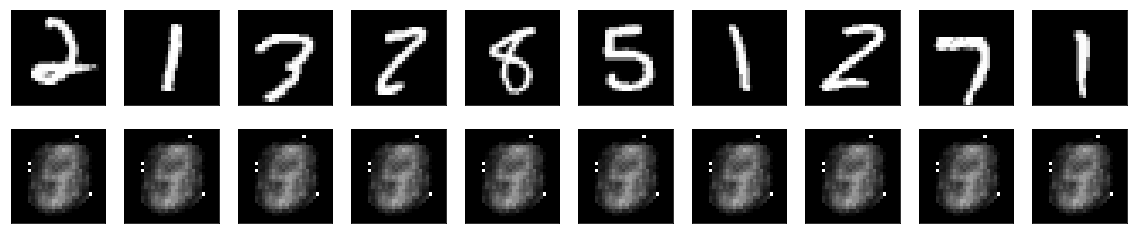

In [5]:
VA.plot_enc_dec(10)

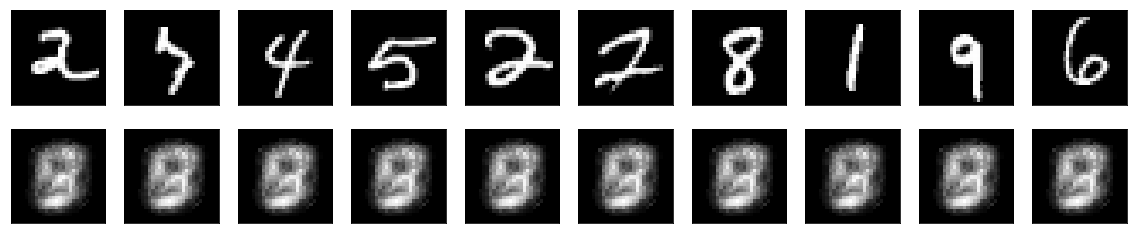

In [6]:
VA.plot_enc_dec(10)